# Occupancy Detection


This dataset contains environmental sensor readings collected from an indoor space, with a total of 17,895 records. Each entry includes a timestamp and measurements of key environmental factors such as temperature, humidity, light intensity, CO2 concentration, and humidity ratio. These variables provide insights into the indoor climate and air quality, which can be useful for various applications, including building automation and energy efficiency analysis. Additionally, the dataset includes an Occupancy variable, which is a binary indicator (0 or 1) showing whether the space was occupied at the time of recording.

The presence of both environmental conditions and occupancy data makes this dataset particularly valuable for machine learning applications, such as predictive modeling for smart buildings. By analyzing patterns in temperature, light, and CO2 levels, models can be developed to accurately determine or predict occupancy, optimizing energy use in HVAC systems. Furthermore, this dataset can be leveraged for studies on indoor air quality and its correlation with human presence, potentially contributing to research in environmental sustainability and workplace comfort.

## Impoting Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score



## Loading Dataset

In [97]:
df=pd.read_csv(r"C:\Users\alant\Downloads\datasetk\datatrain.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17895 entries, 0 to 17894
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17895 non-null  int64  
 1   date           17895 non-null  object 
 2   Temperature    17895 non-null  float64
 3   Humidity       17895 non-null  float64
 4   Light          17895 non-null  float64
 5   CO2            17895 non-null  float64
 6   HumidityRatio  17895 non-null  float64
 7   Occupancy      17895 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 1.1+ MB


## Taking first 5 rows using Head()

In [98]:
df.head()

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,02/04/15 17:51,23.18,27.2720,426.0,721.25,0.004793,1
1,2,02/04/15 17:51,23.15,27.2675,429.5,714.00,0.004783,1
2,3,02/04/15 17:53,23.15,27.2450,426.0,713.50,0.004779,1
3,4,02/04/15 17:54,23.15,27.2000,426.0,708.25,0.004772,1
4,5,02/04/15 17:55,23.10,27.2000,426.0,704.50,0.004757,1


## Taking last 5 rows using Tail()

In [99]:
df.tail()

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
17890,17891,02/18/15 9:15,20.815,27.7175,429.75,1505.25,0.004213,1
17891,17892,02/18/15 9:16,20.865,27.7450,423.50,1514.50,0.004230,1
17892,17893,02/18/15 9:16,20.890,27.7450,423.50,1521.50,0.004237,1
17893,17894,02/18/15 9:17,20.890,28.0225,418.75,1632.00,0.004279,1
17894,17895,02/18/15 9:19,21.000,28.1000,409.00,1864.00,0.004321,1


## Data Cleaning

In [100]:
df.columns=df.columns.str.replace("/","_")

In [101]:
df.isna().sum()

id               0
date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [102]:
df.duplicated().sum()

0

## Statistical Analysis
### 1.Describe

In [103]:
num_col=df.select_dtypes(include=['float64','int64'])
des=num_col.describe()
print(des)

                 id   Temperature      Humidity         Light           CO2  \
count  17895.000000  17895.000000  17895.000000  17895.000000  17895.000000   
mean    8948.000000     20.827630     27.998747    121.453183    686.479722   
std     5165.985869      1.036616      5.169896    202.207255    313.669585   
min        1.000000     19.000000     16.745000      0.000000    412.750000   
25%     4474.500000     20.100000     24.890000      0.000000    458.750000   
50%     8948.000000     20.625000     27.793333      0.000000    564.000000   
75%    13421.500000     21.500000     31.856667    217.916667    792.000000   
max    17895.000000     24.390000     39.500000   1581.000000   2076.500000   

       HumidityRatio     Occupancy  
count   17895.000000  17895.000000  
mean        0.004258      0.211120  
std         0.000784      0.408115  
min         0.002674      0.000000  
25%         0.003767      0.000000  
50%         0.004343      0.000000  
75%         0.004860      0.0

### 2.Covariance

In [104]:
covariance=num_col.cov()
print(covariance)

                         id  Temperature      Humidity         Light  \
id             2.668741e+07    69.749719  14664.485774 -33149.692410   
Temperature    6.974972e+01     1.074573     -1.007742    140.617966   
Humidity       1.466449e+04    -1.007742     26.727829    -61.883369   
Light         -3.314969e+04   140.617966    -61.883369  40887.773971   
CO2            6.803191e+05   128.341728    447.935674  25036.879268   
HumidityRatio  2.257098e+00     0.000126      0.003810      0.027844   
Occupancy     -2.849441e+01     0.219876      0.057551     75.158572   

                         CO2  HumidityRatio  Occupancy  
id             680319.072248   2.257098e+00 -28.494412  
Temperature       128.341728   1.257038e-04   0.219876  
Humidity          447.935674   3.809547e-03   0.057551  
Light           25036.879268   2.784422e-02  75.158572  
CO2             98388.608716   1.065092e-01  58.854778  
HumidityRatio       0.106509   6.150018e-07   0.000070  
Occupancy          58.85

### 3.Corelation

In [105]:
corealation=num_col.corr()
print(corealation)

                     id  Temperature  Humidity     Light       CO2  \
id             1.000000     0.013025  0.549075 -0.031734  0.419843   
Temperature    0.013025     1.000000 -0.188040  0.670851  0.394709   
Humidity       0.549075    -0.188040  1.000000 -0.059196  0.276224   
Light         -0.031734     0.670851 -0.059196  1.000000  0.394740   
CO2            0.419843     0.394709  0.276224  0.394740  1.000000   
HumidityRatio  0.557133     0.154630  0.939622  0.175590  0.432989   
Occupancy     -0.013515     0.519730  0.027276  0.910750  0.459755   

               HumidityRatio  Occupancy  
id                  0.557133  -0.013515  
Temperature         0.154630   0.519730  
Humidity            0.939622   0.027276  
Light               0.175590   0.910750  
CO2                 0.432989   0.459755  
HumidityRatio       1.000000   0.217607  
Occupancy           0.217607   1.000000  


## Heatmap

<Axes: >

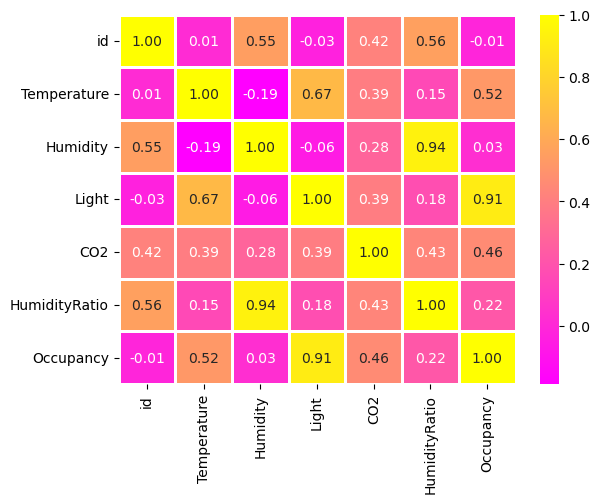

In [106]:
sns.heatmap(corealation,annot=True,cmap='spring',fmt='0.2f',linewidths=0.8)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'id'),
  Text(1, 0, 'Temperature'),
  Text(2, 0, 'Humidity'),
  Text(3, 0, 'Light'),
  Text(4, 0, 'CO2'),
  Text(5, 0, 'HumidityRatio'),
  Text(6, 0, 'Occupancy')])

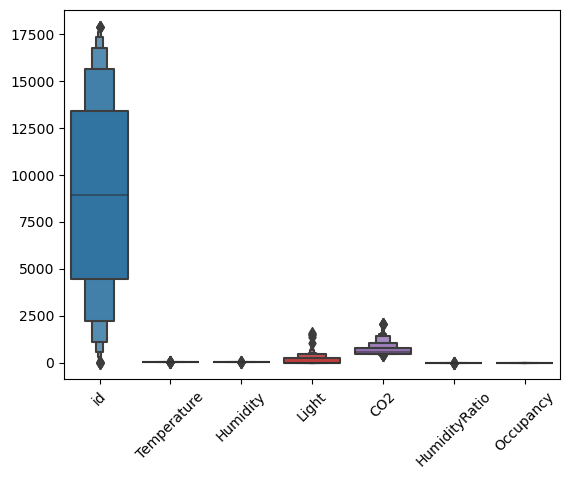

In [107]:
sns.boxenplot(data=df)
plt.xticks(rotation=45)


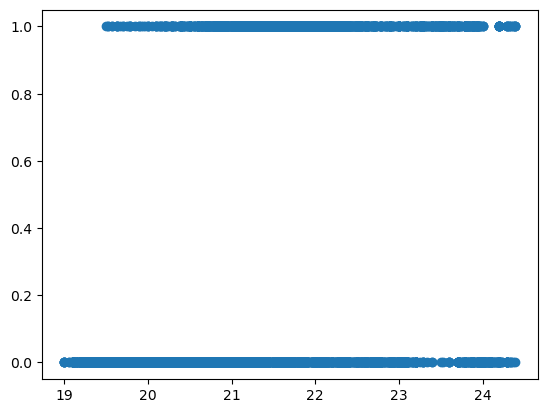

In [115]:
plt.scatter(df['Temperature'],df['Occupancy'])
plt.show()

## Seperating dependent & Independent variables

In [108]:
x=df.drop(columns=['date','Occupancy'],axis=1)
y=df['Occupancy']

## Split the Dataset into Training & Testing

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [111]:
stand=StandardScaler()
x_train=stand.fit_transform(x_train)
x_test=stand.fit_transform(x_test)

## Building the KNN Model

In [112]:
model=KNeighborsClassifier(n_neighbors=5,p=2,metric="minkowski")
model.fit(x_train,y_train)



KNeighborsClassifier()

## Predicting the test data

In [113]:
y_pred=model.predict(x_test)
print("Mean absolute  error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("Root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))






Mean absolute  error: 0.008382229673093043
Mean squared error: 0.008382229673093043
Root mean squared error: 0.09155451749145448


## Caluculating the Accuracy

In [114]:
acc=accuracy_score(y_test,y_pred)
print("The Accuracy is:",acc*100,"%")

The Accuracy is: 99.16177703269071 %


## Summary
This dataset provides a valuable resource for analyzing the relationship between indoor environmental conditions and occupancy patterns. With features such as temperature, humidity, light intensity, CO2 levels, and humidity ratio, researchers and developers can explore how these factors influence and predict human presence in a given space. The inclusion of an Occupancy label enables the development of machine learning models that can classify or forecast occupancy status based on sensor data. This can be particularly useful for energy-efficient building management, where heating, ventilation, and lighting systems can be adjusted dynamically to optimize resource usage.

In conclusion, this dataset can serve multiple purposes, from occupancy detection and smart automation to indoor air quality monitoring. By leveraging data-driven insights, organizations can improve workplace comfort, reduce energy waste, and enhance overall building efficiency. Further analysis and feature engineering could refine predictive accuracy, making this dataset a strong foundation for intelligent systems in modern smart buildings and sustainability initiatives.